In [1]:
%matplotlib inline

#Importing all the required libraries
import numpy as np   
import pandas as pd    
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings("ignore")

In [2]:
a = pd.read_csv('Car_Crash.csv')

In [3]:
a.columns

Index(['Unnamed: 0', 'dvcat', 'weight', 'Survived', 'airbag', 'seatbelt',
       'frontal', 'sex', 'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole',
       'deploy', 'injSeverity', 'caseid'],
      dtype='object')

In [4]:
a.shape

(11217, 16)

In [5]:
a.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [6]:
#Dropped unnecessary column 'Unnamed'
a = a.drop('Unnamed: 0', axis = 1)

In [7]:
#Dropped unnecessary column 'Unnamed'
a = a.drop('caseid', axis = 1)

In [8]:
a.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0


In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [10]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.00
injSeverity,11140.0,1.825583,1.378535,0.0,1.000,2.000,3.000,5.00


In [11]:
a['Survived'].value_counts()

survived        10037
Not_Survived     1180
Name: Survived, dtype: int64

In [12]:
survived = 100*(10037/11217)
survived1 = round(survived,2)
print("The percentage of people surviving is",survived1)
Not_Survived = 100*(1180/11217)
Not_Survived1 = round(Not_Survived,2)
print("The percentage of people not surviving is",Not_Survived1)

The percentage of people surviving is 89.48
The percentage of people not surviving is 10.52


The data looks unbalanced

In [13]:
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [14]:
((a > UL) | (a < LL)).sum()

Survived          0
abcat             0
ageOFocc         68
airbag            0
deploy            0
dvcat             0
frontal           0
injSeverity       0
occRole           0
seatbelt          0
sex               0
weight         1412
yearVeh         147
yearacc         622
dtype: int64

In [15]:
for column in a.columns:
    print(a[column].unique())
    print(a[column].value_counts())

['55+' '25-39' '10-24' '40-54' '1-9km/h']
10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64
[  27.078        89.627        13.374      ... 3179.68799999   71.228
   10.474     ]
1.000      65
72.176     57
38.994     53
54.303     52
10.761     51
           ..
207.714     1
219.915     1
6.005       1
132.932     1
54.299      1
Name: weight, Length: 4551, dtype: int64
['Not_Survived' 'survived']
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64
['none' 'airbag']
airbag    7064
none      4153
Name: airbag, dtype: int64
['none' 'belted']
belted    7849
none      3368
Name: seatbelt, dtype: int64
[1 0]
1    7224
0    3993
Name: frontal, dtype: int64
['m' 'f']
m    6048
f    5169
Name: sex, dtype: int64
[32 54 67 64 23 77 34 37 33 84 87 38 75 19 22 76 17 62 63 70 26 41 47 25
 27 50 20 39 21 56 86 49 45 81 30 18 61 29 35 58 46 91 31 82 78 59 72 43
 65 83 74 44 57 24 55 73 71 36 16 40 53 79 80 52 42 97 51 28 68 

In [16]:
a1 = a.select_dtypes(['object','category'])
a2 = a.select_dtypes(['int64','float64'])

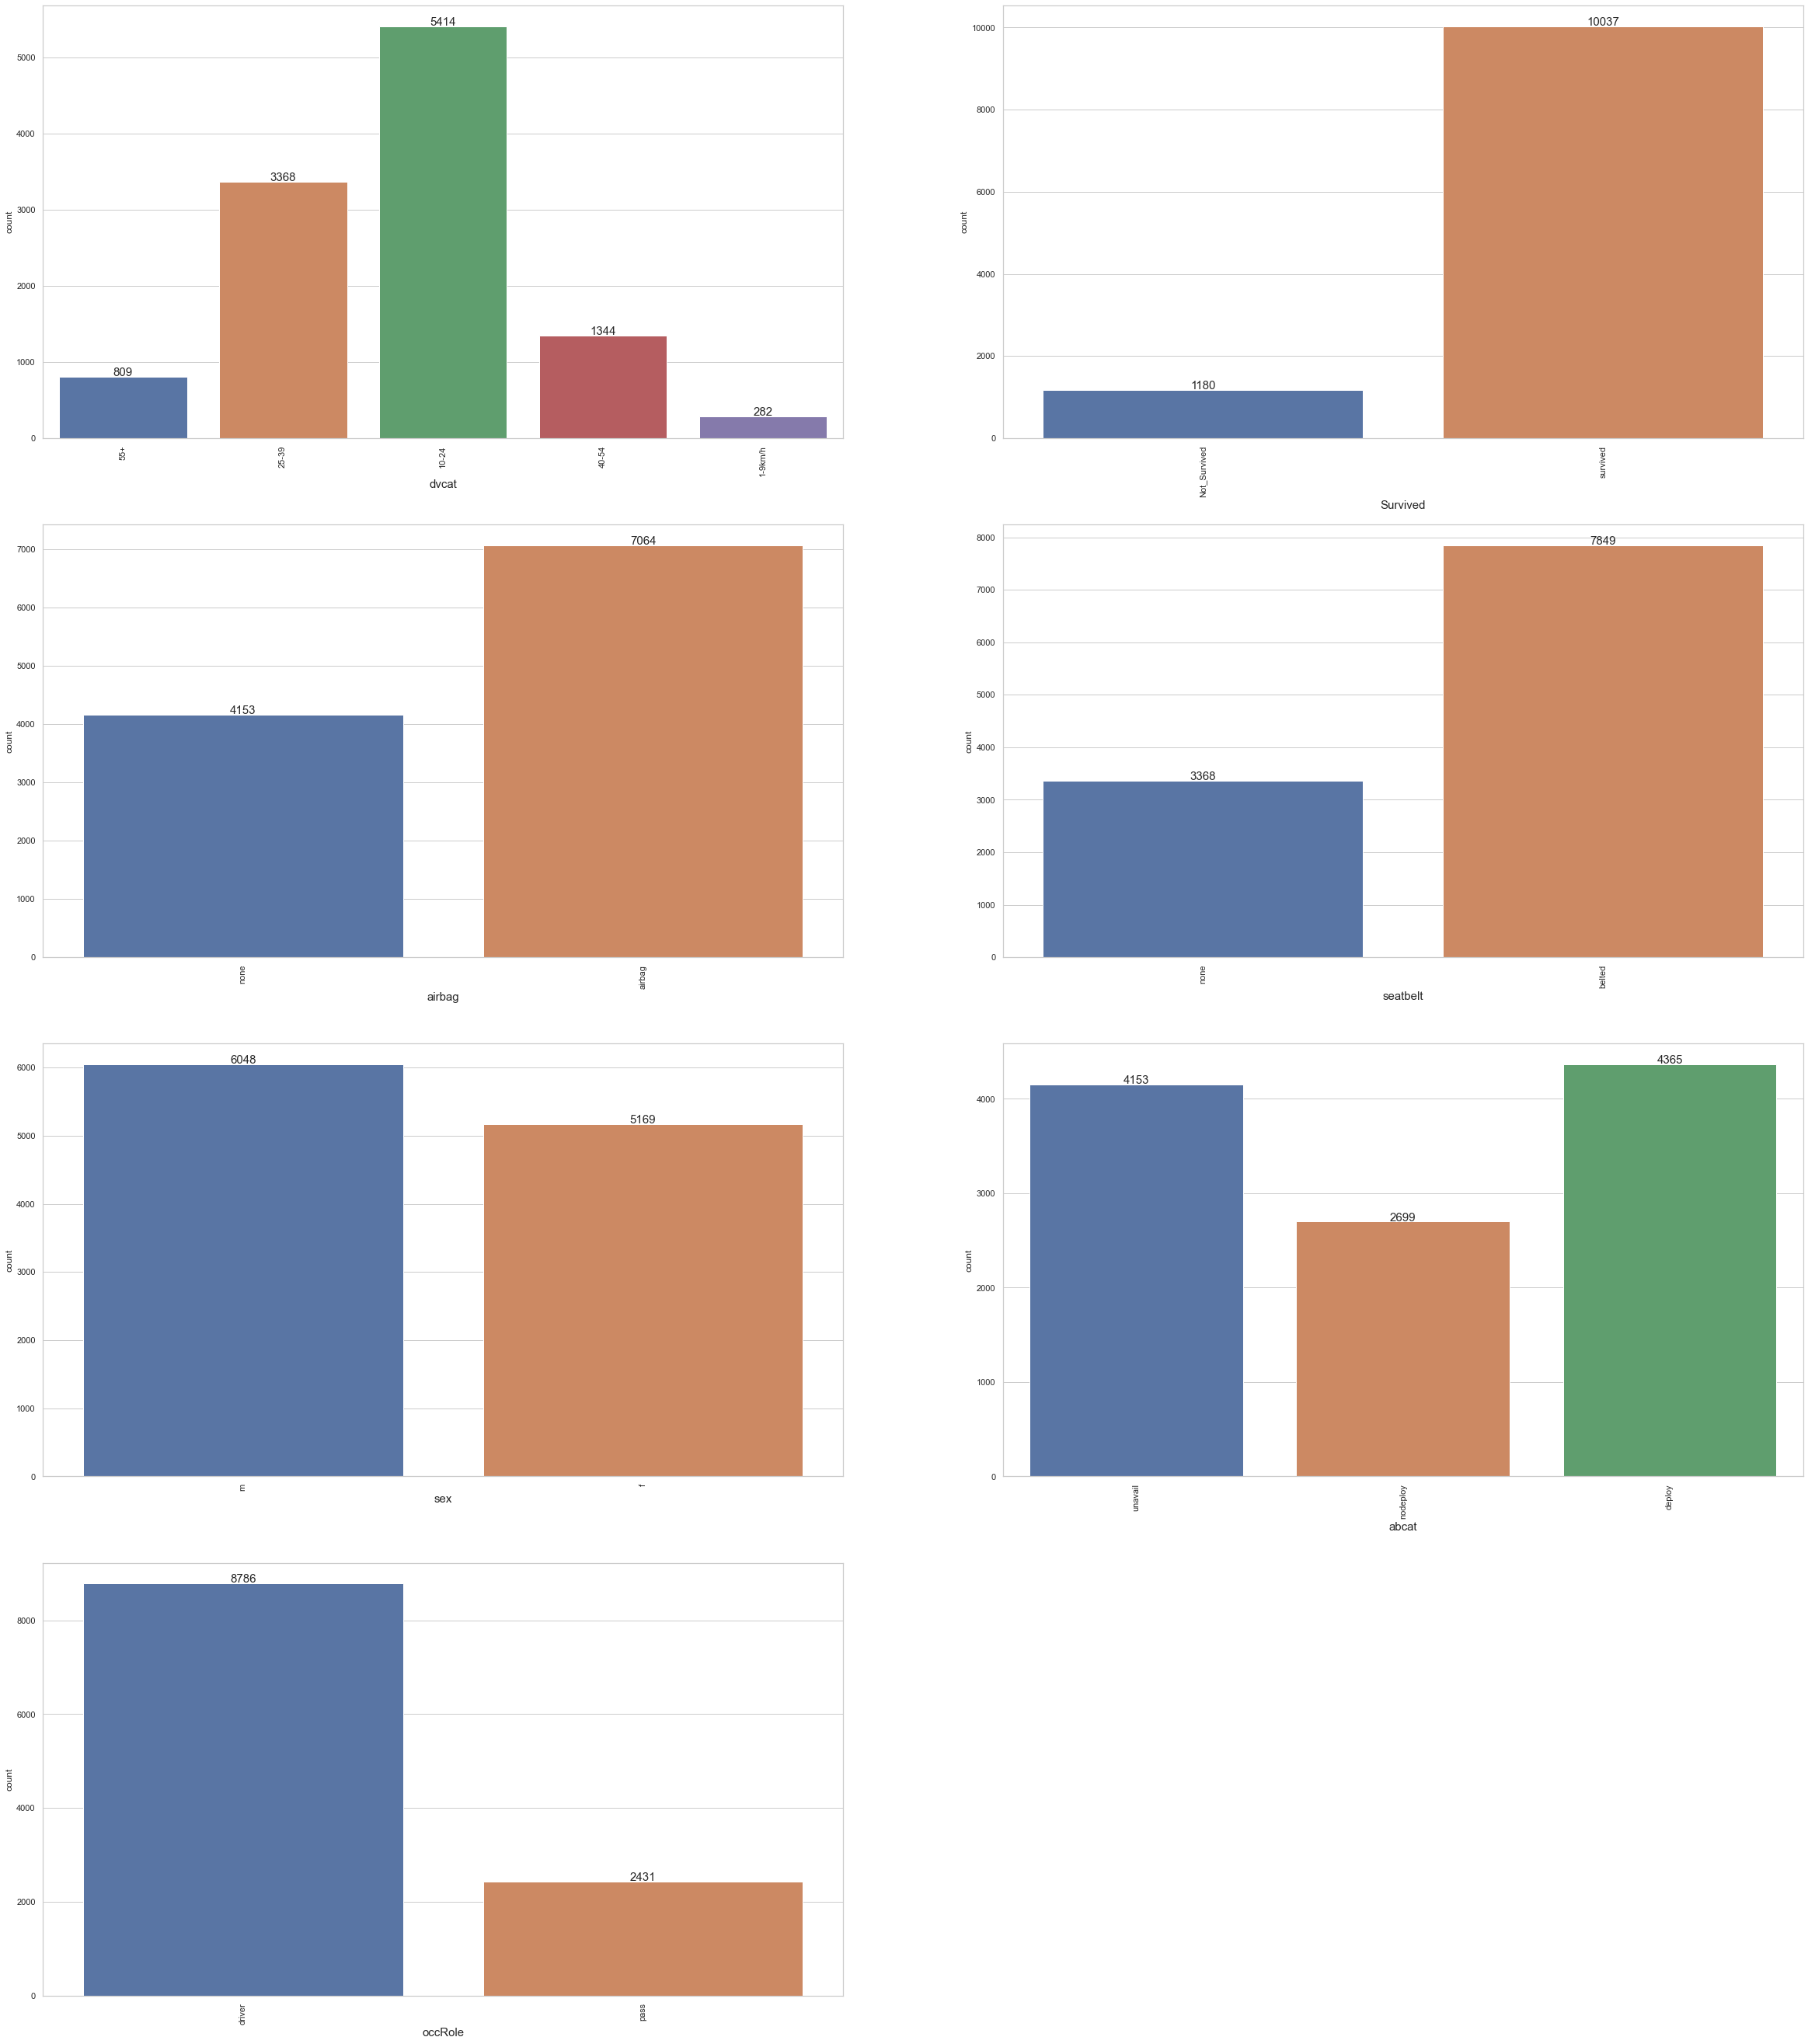

In [17]:
l1 = len(a1.columns) #a1 is categorical variable df
n = 1
fig = plt.figure(figsize=(l1*5.8,l1*12))
for column in a1.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(column,fontsize =15)
    plt.xticks(rotation=90)
    ax1 = sns.countplot(a1[column])
    n = n + 1
    for q in ax1.patches:
        ax1.annotate(format(q.get_height()), (q.get_x() + q.get_width() / 2,
        q.get_height()), ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',fontsize = 15)

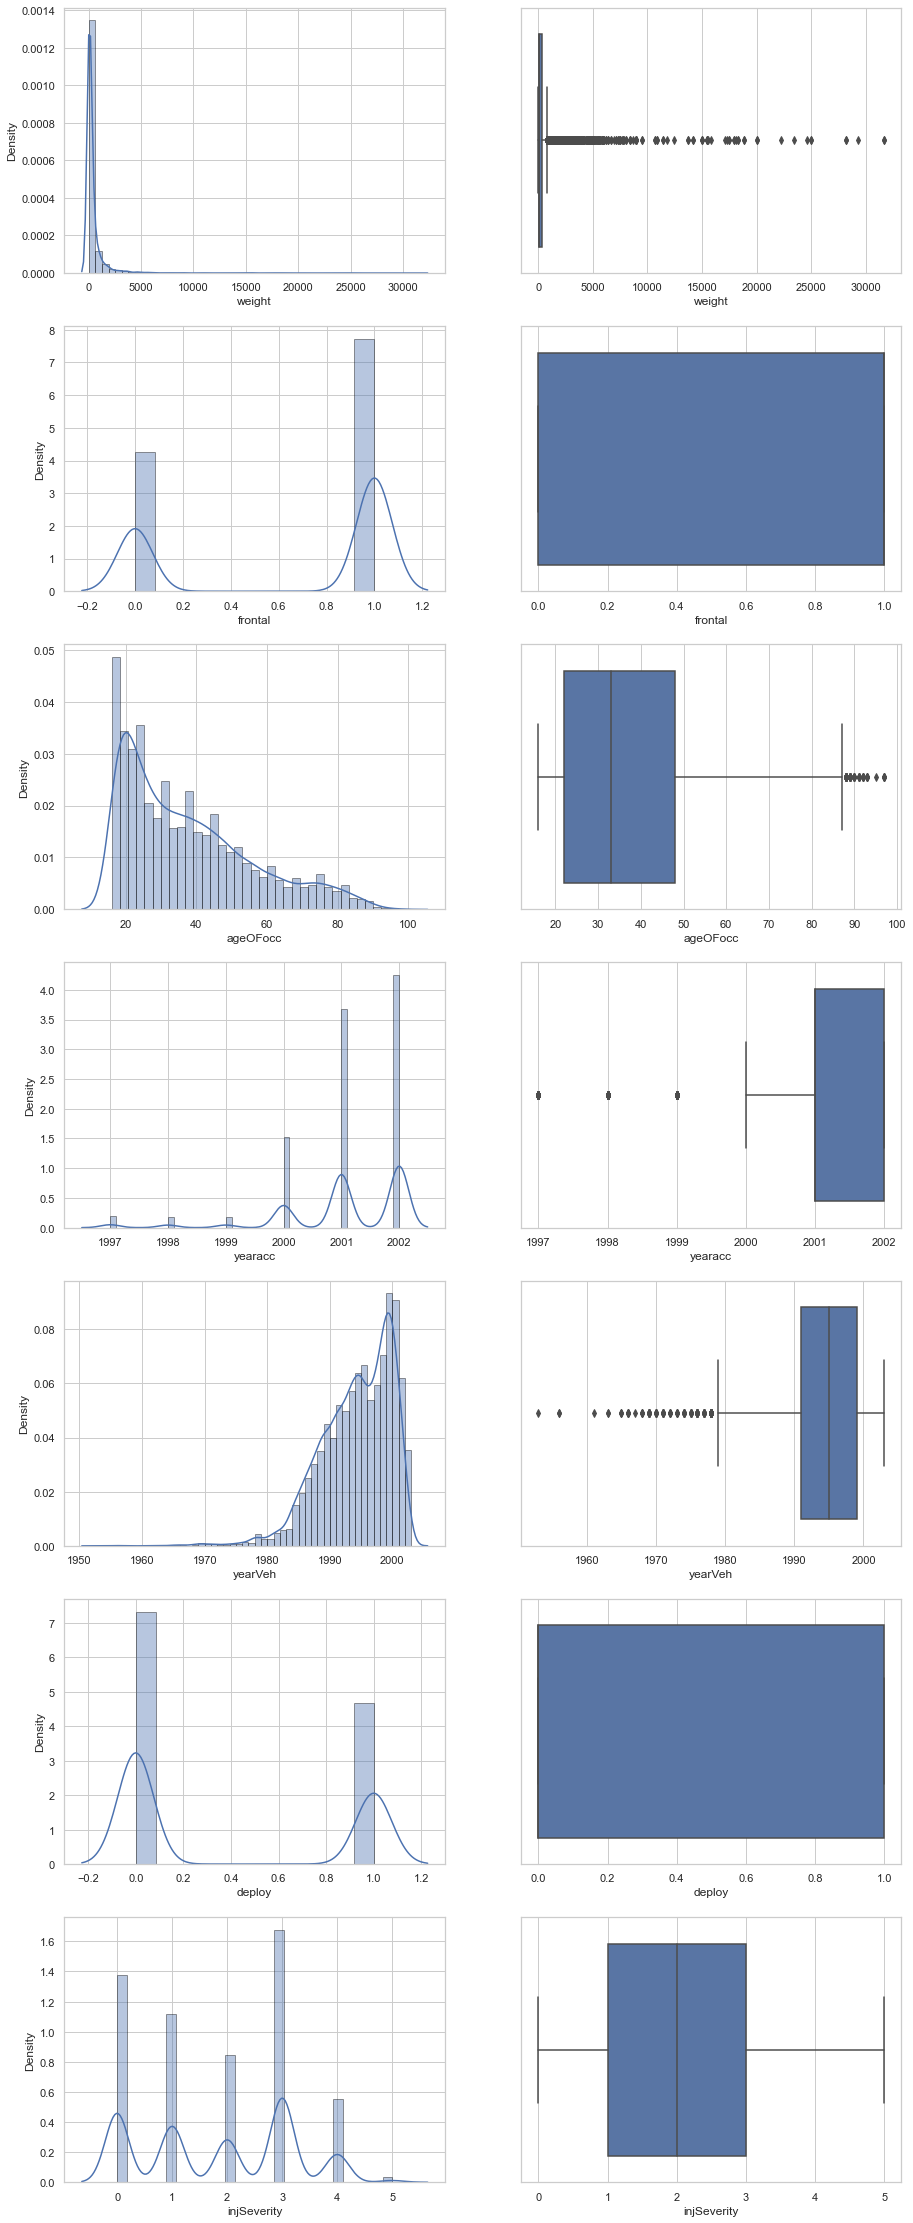

In [18]:
l2 = len(a2.columns)
n = 1
fig = plt.figure(figsize=(15,40))
for column in a2.columns:
        plt.subplot(l2, 2, n)
        plt.xlabel(column)
        sns.distplot(a2[column], hist_kws= dict(ec = 'black'))
        n = n + 1
        plt.subplot(l2, 2, n)
        plt.xlabel(column)
        sns.boxplot(x = a2[column])
        n = n + 1

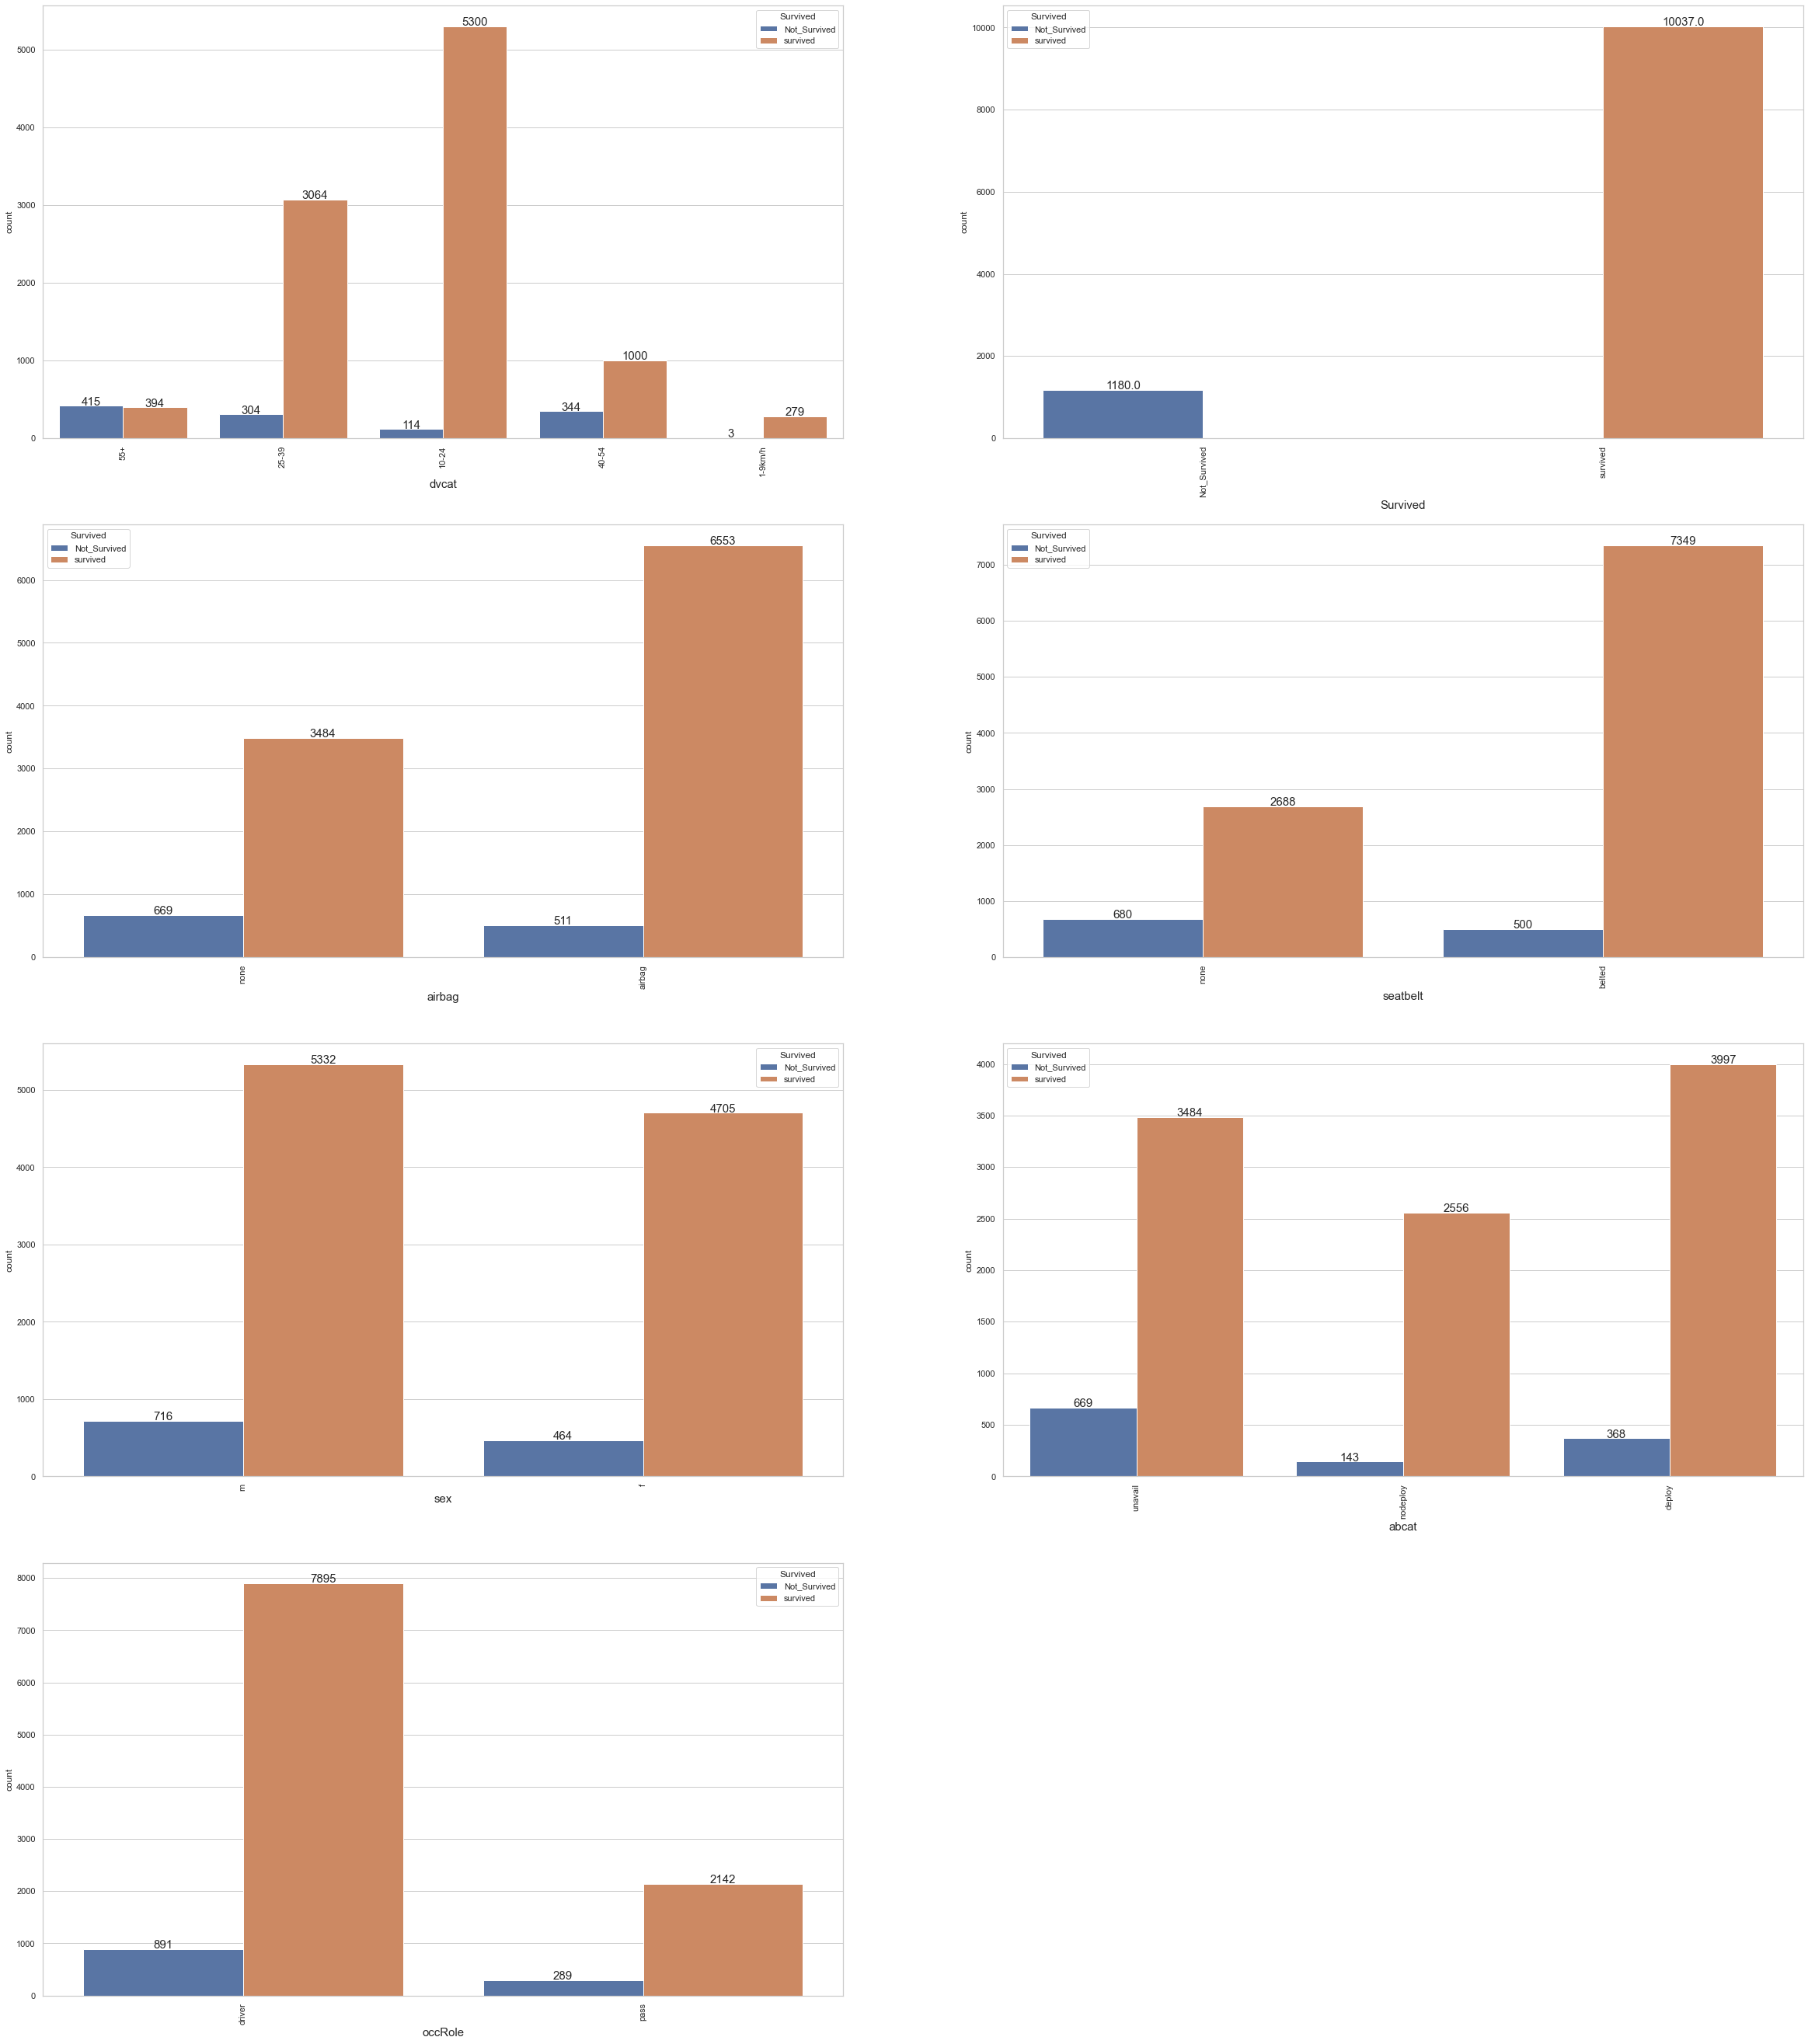

In [19]:
l1 = len(a1.columns)
n = 1
fig = plt.figure(figsize=(l1*5.8,l1*12))
for col in a1.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(col,fontsize =15)
    plt.xticks(rotation=90)
    ax1 = sns.countplot(a1[col], hue=a['Survived'])
    n = n + 1
    for p in ax1.patches:
                ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center',xytext=(0, 5),textcoords='offset points', fontsize =15)

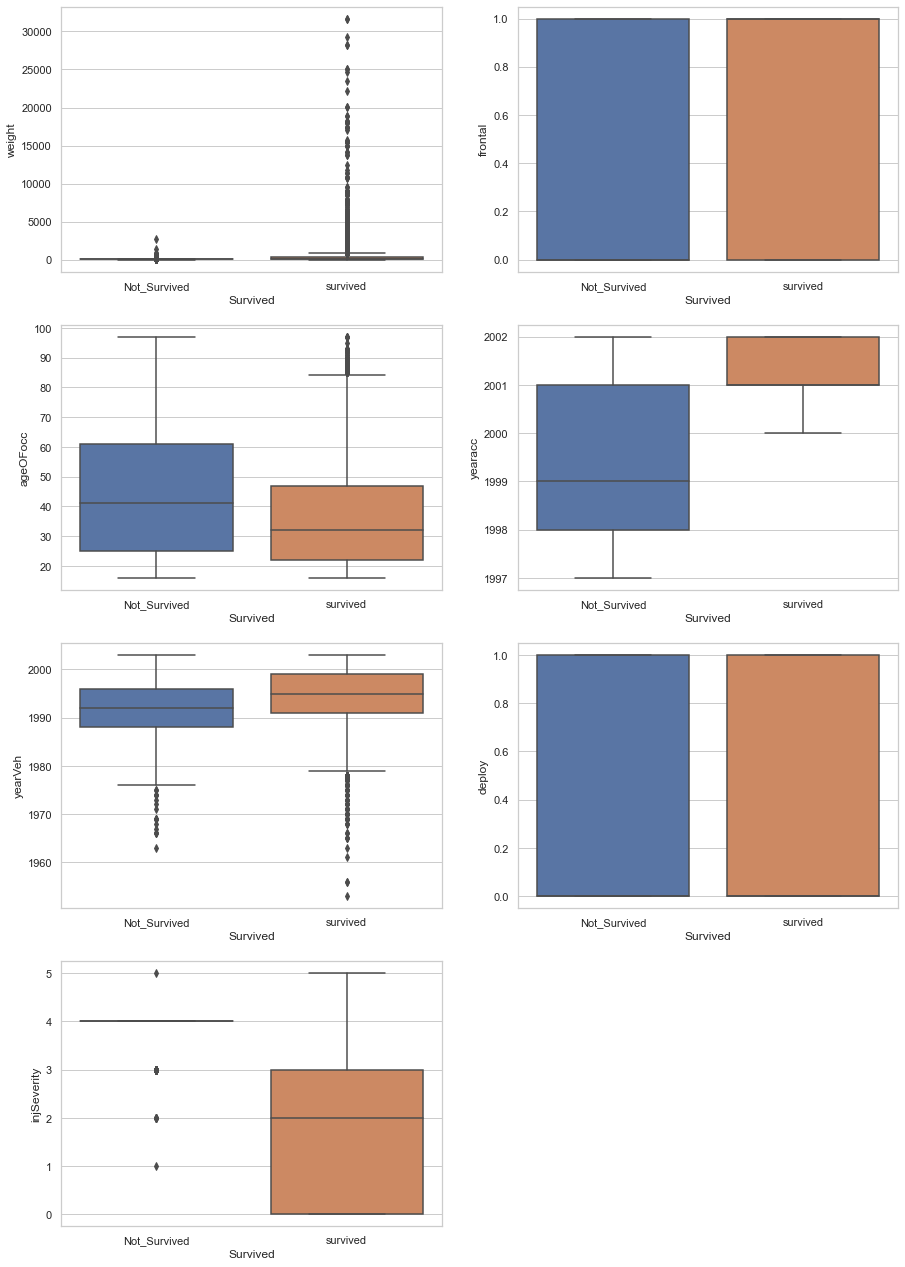

In [20]:
l1 = len(a2.columns)
n = 1
fig = plt.figure(figsize=(15,40))
for col in a2.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(col)
    sns.boxplot(x = a['Survived'],y = a2[col])
    n = n + 1

In [21]:
a1.head(10)

,dvcat,Survived,airbag,seatbelt,sex,abcat,occRole
0,55+,Not_Survived,none,none,m,unavail,driver
1,25-39,Not_Survived,airbag,belted,f,nodeploy,driver
2,55+,Not_Survived,none,belted,m,unavail,driver
3,55+,Not_Survived,none,belted,f,unavail,pass
4,55+,Not_Survived,none,none,m,unavail,driver
5,25-39,Not_Survived,none,belted,f,unavail,pass
6,55+,Not_Survived,none,none,m,unavail,driver
7,10-24,Not_Survived,airbag,belted,m,deploy,driver
8,40-54,Not_Survived,none,none,f,unavail,driver
9,25-39,Not_Survived,airbag,none,f,deploy,driver


In [22]:
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [23]:
((a > UL) | (a < LL)).sum()

Survived          0
abcat             0
ageOFocc         68
airbag            0
deploy            0
dvcat             0
frontal           0
injSeverity       0
occRole           0
seatbelt          0
sex               0
weight         1412
yearVeh         147
yearacc         622
dtype: int64

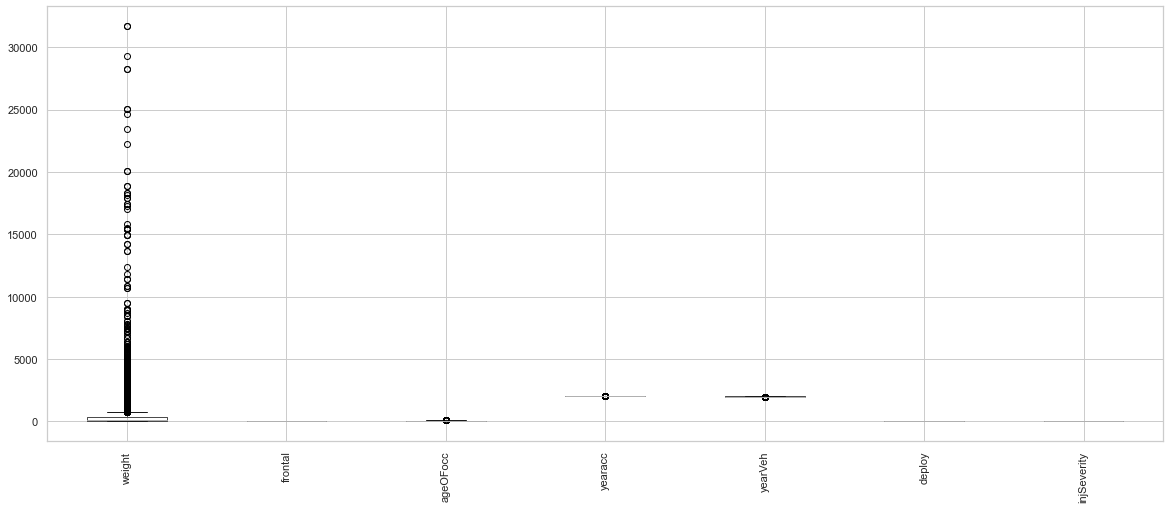

In [24]:
plt.figure(figsize = (20,8))
a.boxplot(rot = 90);

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [26]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [27]:
for column in a.columns:
    if (a[column].dtype != 'O') :
        lr,ur = remove_outlier(a[column])
        a[column]=np.where(a[column]>ur,ur,a[column])
        a[column]=np.where(a[column]<lr,lr,a[column])

In [28]:
((a > UL) | (a < LL)).sum()

Survived       0
abcat          0
ageOFocc       0
airbag         0
deploy         0
dvcat          0
frontal        0
injSeverity    0
occRole        0
seatbelt       0
sex            0
weight         0
yearVeh        0
yearacc        0
dtype: int64

In [29]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  float64
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  float64
 8   yearacc      11217 non-null  float64
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  float64
 13  injSeverity  11140 non-null  float64
dtypes: float64(7), object(7)
memory usage: 1.2+ MB


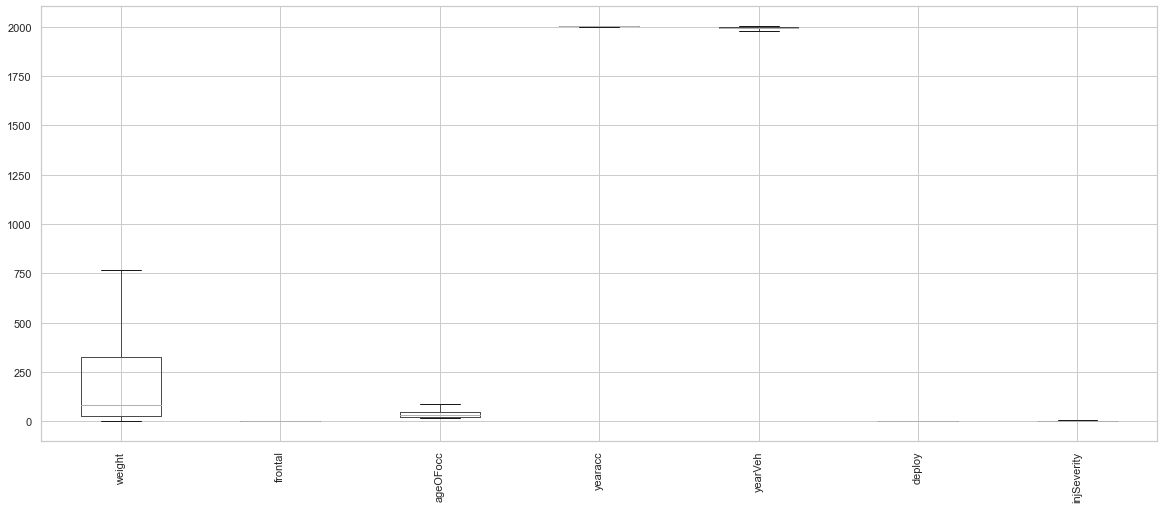

In [30]:
plt.figure(figsize = (20,8))
a.boxplot(rot = 90);

In [31]:
a.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1.0,m,32.0,1999.5,1987.0,unavail,driver,0.0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0.0,f,54.0,1999.5,1994.0,nodeploy,driver,0.0,4.0
2,55+,27.078,Not_Survived,none,belted,1.0,m,67.0,1999.5,1992.0,unavail,driver,0.0,4.0
3,55+,27.078,Not_Survived,none,belted,1.0,f,64.0,1999.5,1992.0,unavail,pass,0.0,4.0
4,55+,13.374,Not_Survived,none,none,1.0,m,23.0,1999.5,1986.0,unavail,driver,0.0,4.0


In [32]:
a['Survived'] = a['Survived'].map(lambda x: 1 if x == 'survived' else 0)

In [33]:
a['Survived'].unique()
a['Survived'].value_counts()

1    10037
0     1180
Name: Survived, dtype: int64

In [34]:
a['airbag'] = a['airbag'].map(lambda x: 1 if x == 'airbag' else 0)

In [35]:
a['seatbelt'] = a['seatbelt'].map(lambda x: 1 if x == 'belted' else 0)

In [36]:
a['abcat'] = a['abcat'].map(lambda x: 1 if x == 'deploy' else 0)

In [37]:
a = pd.get_dummies(a, columns = ['sex'])

In [38]:
a = pd.get_dummies(a, columns = ['occRole'])

In [39]:
a['dvcat'].unique()
a['dvcat'].value_counts()

10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64

In [40]:
label  = {'1-9km/h':4,'10-24':3,'25-39':2,'40-54':1,'55+':0}
a['dvcat'] = a['dvcat'].apply(lambda x: label[x])
a['dvcat'] = a['dvcat'].astype('int')

In [74]:
a['dvcat'].unique()
a['dvcat'].value_counts()

3    5414
2    3368
1    1344
0     809
4     282
Name: dvcat, dtype: int64

In [41]:
a['injSeverity'].unique()
a['injSeverity'].value_counts()

3.0    3337
0.0    2734
1.0    2218
2.0    1682
4.0    1101
5.0      68
Name: injSeverity, dtype: int64

In [42]:
a.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,abcat,deploy,injSeverity,sex_f,sex_m,occRole_driver,occRole_pass
0,0,27.078,0,0,0,1.0,32.0,1999.5,1987.0,0,0.0,4.0,0,1,1,0
1,2,89.627,0,1,1,0.0,54.0,1999.5,1994.0,0,0.0,4.0,1,0,1,0
2,0,27.078,0,0,1,1.0,67.0,1999.5,1992.0,0,0.0,4.0,0,1,1,0
3,0,27.078,0,0,1,1.0,64.0,1999.5,1992.0,0,0.0,4.0,1,0,0,1
4,0,13.374,0,0,0,1.0,23.0,1999.5,1986.0,0,0.0,4.0,0,1,1,0


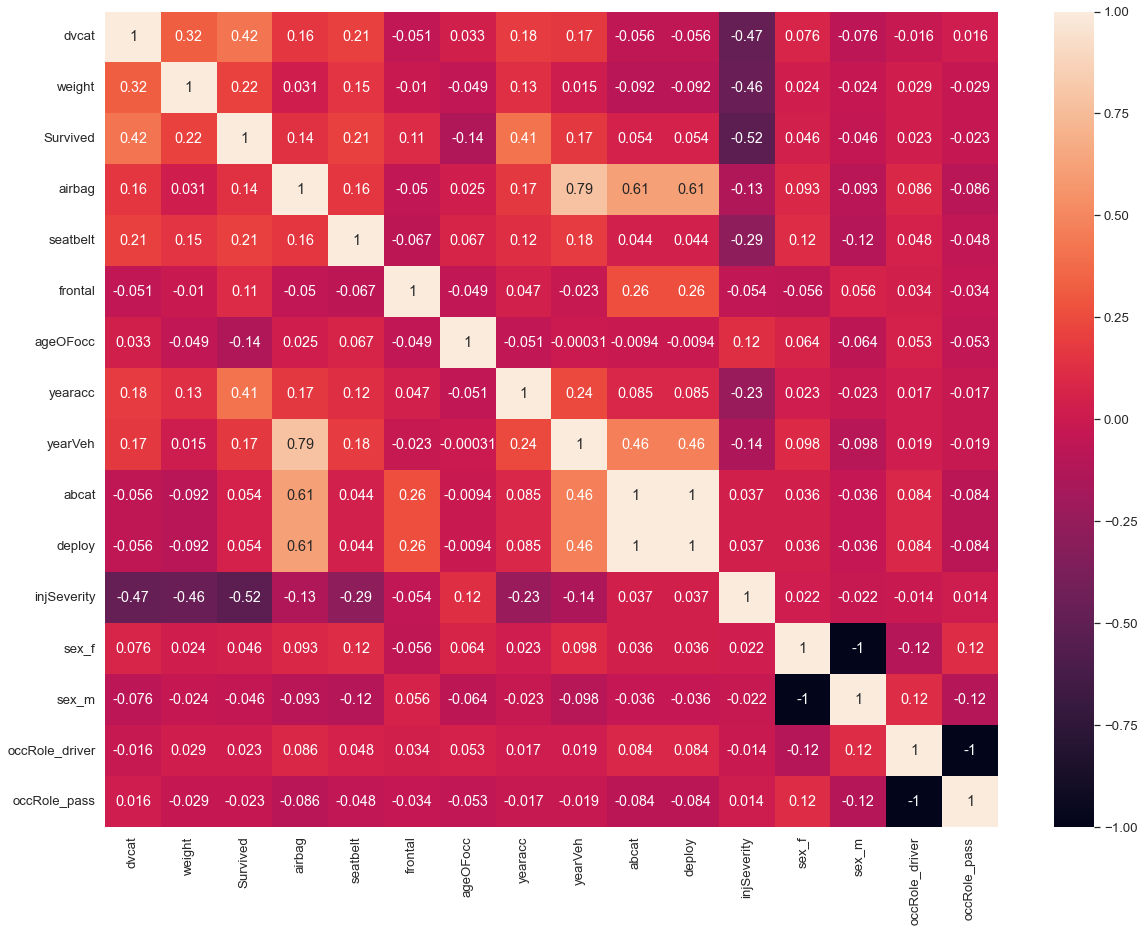

In [43]:
# construct heatmap with only continuous variables
plt.figure(figsize=(20,15))
sns.set(font_scale=1.2)
sns.heatmap(a.corr(), annot=True)
plt.show()

In [44]:
a.isnull().sum()

dvcat              0
weight             0
Survived           0
airbag             0
seatbelt           0
frontal            0
ageOFocc           0
yearacc            0
yearVeh            0
abcat              0
deploy             0
injSeverity       77
sex_f              0
sex_m              0
occRole_driver     0
occRole_pass       0
dtype: int64

In [45]:
a['injSeverity'].median()

2.0

In [46]:
a['injSeverity'].fillna(a['injSeverity'].median(), inplace = True)

In [47]:
a.isnull().sum()

dvcat             0
weight            0
Survived          0
airbag            0
seatbelt          0
frontal           0
ageOFocc          0
yearacc           0
yearVeh           0
abcat             0
deploy            0
injSeverity       0
sex_f             0
sex_m             0
occRole_driver    0
occRole_pass      0
dtype: int64

In [48]:
a['Survived'].unique()
a['Survived'].value_counts()

1    10037
0     1180
Name: Survived, dtype: int64

In [49]:
a.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,ageOFocc,yearacc,yearVeh,abcat,deploy,injSeverity,sex_f,sex_m,occRole_driver,occRole_pass
0,0,27.078,0,0,0,1.0,32.0,1999.5,1987.0,0,0.0,4.0,0,1,1,0
1,2,89.627,0,1,1,0.0,54.0,1999.5,1994.0,0,0.0,4.0,1,0,1,0
2,0,27.078,0,0,1,1.0,67.0,1999.5,1992.0,0,0.0,4.0,0,1,1,0
3,0,27.078,0,0,1,1.0,64.0,1999.5,1992.0,0,0.0,4.0,1,0,0,1
4,0,13.374,0,0,0,1.0,23.0,1999.5,1986.0,0,0.0,4.0,0,1,1,0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [51]:
y = a['Survived']
X = a.drop('Survived',axis=1)

In [52]:
y.unique()
y.value_counts()

1    10037
0     1180
Name: Survived, dtype: int64

In [53]:
sc = StandardScaler()
X_fit = sc.fit_transform(X)
X = pd.DataFrame(X_fit,columns=X.columns)

In [54]:
sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X, y)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
model_LR = LogisticRegression()
model_LR.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [56]:
print('The model score for Logistic Regression Training set is',model_LR.score(X_train_LR,y_train_LR))
print('\n')
print('The model score for Logistic Regression Testing set is',model_LR.score(X_test_LR,y_test_LR))

The model score for Logistic Regression Training set is 0.9732403387659241


The model score for Logistic Regression Testing set is 0.9731031047650672


In [57]:
y_train_pred_LR = model_LR.predict(X_train_LR)
y_test_pred_LR = model_LR.predict(X_test_LR)

### Logistic Regression Train Set

The classification report & Confution matrix for Logistic Regression training set is
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      7002
           1       0.97      0.98      0.97      7049

    accuracy                           0.97     14051
   macro avg       0.97      0.97      0.97     14051
weighted avg       0.97      0.97      0.97     14051



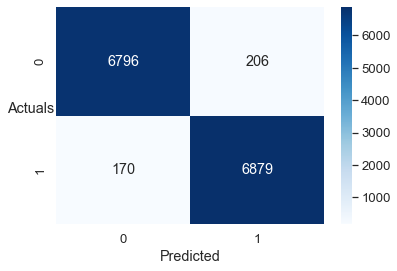

In [58]:
sns.heatmap((confusion_matrix(y_train_LR,y_train_pred_LR)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print('The classification report & Confution matrix for Logistic Regression training set is\n',classification_report(y_train_LR, y_train_pred_LR))

The AUC score for Logistic Regression Training dataset is: 0.9916


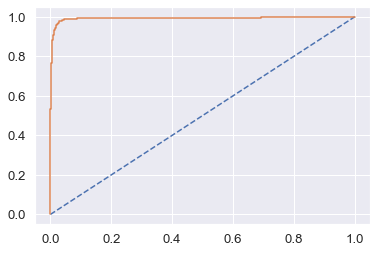

In [59]:
probs_LR_train = model_LR.predict_proba(X_train_LR)
probs_LR_train = probs_LR_train[:,1]
auc_train = roc_auc_score(y_train_LR, probs_LR_train)
print('The AUC score for Logistic Regression Training dataset is: %.4f'%auc_train)
train_fpr_LR, train_tpr_LR, train_thresholds_LR = roc_curve(y_train_LR, probs_LR_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_LR, train_tpr_LR);

### Logistic Test Set

The Classification Report & Confusion Matrix for Logistic Regression testing set is
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3035
           1       0.97      0.98      0.97      2988

    accuracy                           0.97      6023
   macro avg       0.97      0.97      0.97      6023
weighted avg       0.97      0.97      0.97      6023



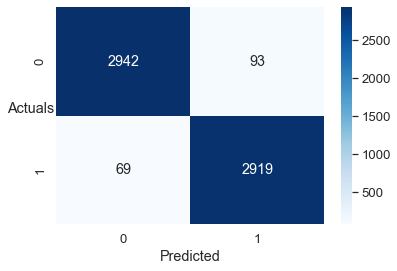

In [60]:
print('The Classification Report & Confusion Matrix for Logistic Regression testing set is\n',classification_report(y_test_LR, y_test_pred_LR))
sns.heatmap((confusion_matrix(y_test_LR,y_test_pred_LR)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Logistic Regression testing set is: 0.9931


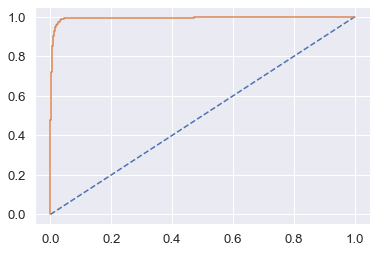

In [61]:
probs_LR_test = model_LR.predict_proba(X_test_LR)
probs_LR_test = probs_LR_test[:,1]
auc_test = roc_auc_score(y_test_LR, probs_LR_test)
print('The AUC score for Logistic Regression testing set is: %.4f'%auc_test)
test_fpr_LR, test_tpr_LR, test_thresholds_LR = roc_curve(y_test_LR, probs_LR_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_LR, test_tpr_LR);

### Linear Discriminant Analysis

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis()

In [63]:
print('The model score for Linear Discriminant Analysis training set is',model_LDA.score(X_train_LDA, y_train_LDA))
print('\n')
print('The model score for Linear Discriminant Analysis testing set is',model_LDA.score(X_test_LDA, y_test_LDA))

The model score for Linear Discriminant Analysis training set is 0.9325314924204683


The model score for Linear Discriminant Analysis testing set is 0.9324257014776689


In [64]:
y_train_pred_LDA = model_LDA.predict(X_train_LDA)
y_test_pred_LDA = model_LDA.predict(X_test_LDA)

### Linear Discriminant Analysis Train Set

The classification report for Linear Discriminant Analysis training set is
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7002
           1       0.98      0.88      0.93      7049

    accuracy                           0.93     14051
   macro avg       0.94      0.93      0.93     14051
weighted avg       0.94      0.93      0.93     14051



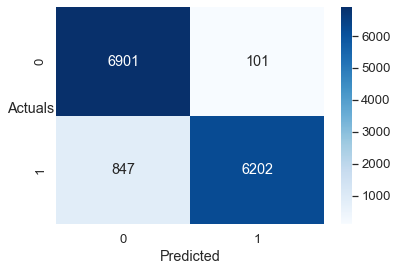

In [65]:
print('The classification report for Linear Discriminant Analysis training set is\n',classification_report(y_train_LDA, y_train_pred_LDA))
sns.heatmap((confusion_matrix(y_train_LDA,y_train_pred_LDA)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Linear Discriminant Analysis training set is: 0.989


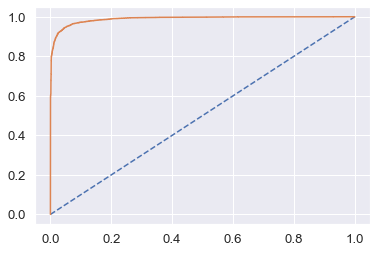

In [66]:
probs_LDA_train = model_LDA.predict_proba(X_train_LDA)
probs_LDA_train = probs_LDA_train[:,1]
auc_train_LDA = roc_auc_score(y_train_LDA, probs_LDA_train)
print('The AUC score for Linear Discriminant Analysis training set is: %.3f'%auc_train_LDA)

train_fpr_LDA, train_tpr_LDA, train_thresholds_LDA = roc_curve(y_train_LDA, probs_LDA_train);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(train_fpr_LDA, train_tpr_LDA);

### Linear Discriminant Analysis Test Set

The classification report for Linear Discriminant Analysis testing set is
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      3035
           1       0.98      0.88      0.93      2988

    accuracy                           0.93      6023
   macro avg       0.94      0.93      0.93      6023
weighted avg       0.94      0.93      0.93      6023



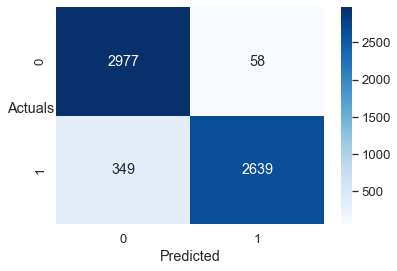

In [67]:
print('The classification report for Linear Discriminant Analysis testing set is\n',classification_report(y_test_LDA, y_test_pred_LDA))
sns.heatmap((confusion_matrix(y_test_LDA,y_test_pred_LDA)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

The AUC score for Linear Discriminant Analysis testing set is: 0.990


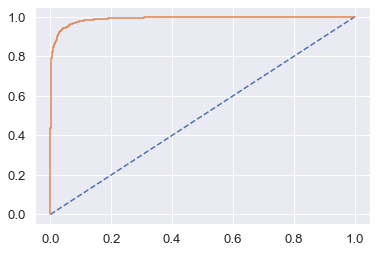

In [68]:
probs_LDA_test = model_LDA.predict_proba(X_test_LDA)
probs_LDA_test = probs_LDA_test[:,1]
auc_test_LDA = roc_auc_score(y_test_LDA, probs_LDA_test)

print('The AUC score for Linear Discriminant Analysis testing set is: %.3f'%auc_test_LDA)
test_fpr_LDA, test_tpr_LDA, test_thresholds_LDA = roc_curve(y_test_LDA, probs_LDA_test);
plt.plot([0,1],[0,1], linestyle = '--');
plt.plot(test_fpr_LDA, test_tpr_LDA);

In [69]:
LR_Train_class = classification_report(y_train_LR, y_train_pred_LR , output_dict=True)
df_LR_Train = pd.DataFrame(LR_Train_class).transpose()
LR_Train_precision = round(df_LR_Train.loc['1'][0] , 3)
LR_Train_recall = round(df_LR_Train.loc['1'][1] , 3)
LR_Train_F1score = round(df_LR_Train.loc['1'][2] , 3)
LR_Train_Accuracy = round(df_LR_Train.loc['accuracy'][0], 3)
LR_Train_auc_score = round(auc_train , 3)

In [70]:
LR_Test_class = classification_report(y_test_LR, y_test_pred_LR , output_dict=True)
df_LR_Test = pd.DataFrame(LR_Test_class).transpose()
LR_Test_precision = round(df_LR_Test.loc['1'][0] , 3)
LR_Test_recall = round(df_LR_Test.loc['1'][1] , 3)
LR_Test_F1score = round(df_LR_Test.loc['1'][2] , 3)
LR_Test_Accuracy = round(df_LR_Test.loc['accuracy'][0], 3)
LR_Test_auc_score = round(auc_test , 3)

In [71]:
LDA_Train_class = classification_report(y_train_LDA, y_train_pred_LDA , output_dict=True)
df_LDA_Train = pd.DataFrame(LDA_Train_class).transpose()
LDA_Train_precision = round(df_LDA_Train.loc['1'][0] , 3)
LDA_Train_recall = round(df_LDA_Train.loc['1'][1] , 3)
LDA_Train_F1score = round(df_LDA_Train.loc['1'][2] , 3)
LDA_Train_Accuracy = round(df_LDA_Train.loc['accuracy'][0], 3)
LDA_Train_auc_score = round(auc_train_LDA , 3)

In [72]:
LDA_Test_class = classification_report(y_test_LDA, y_test_pred_LDA , output_dict=True)
df_LDA_Test = pd.DataFrame(LDA_Test_class).transpose()
LDA_Test_precision = round(df_LDA_Test.loc['1'][0] , 3)
LDA_Test_recall = round(df_LDA_Test.loc['1'][1] , 3)
LDA_Test_F1score = round(df_LDA_Test.loc['1'][2] , 3)
LDA_Test_Accuracy = round(df_LDA_Test.loc['accuracy'][0], 3)
LDA_Test_auc_score = round(auc_test_LDA , 3)

In [73]:
pd.set_option('display.max_columns', None)
index = ['Precision','Recall','F1 Score','Accuracy','AUC Score']
pd.DataFrame({'LR Train' :[LR_Train_precision , LR_Train_recall ,LR_Train_F1score, LR_Train_Accuracy, LR_Train_auc_score],
'LR Test':[LR_Test_precision, LR_Test_recall, LR_Test_F1score, LR_Test_Accuracy,LR_Test_auc_score],
'LDA Train' :[LDA_Train_precision, LDA_Train_recall, LDA_Train_F1score, LDA_Train_Accuracy, LDA_Train_auc_score],
'LDA Test' :[LDA_Test_precision,LDA_Test_recall,LDA_Test_F1score,LDA_Test_Accuracy,LDA_Test_auc_score],},index= index)

,LR Train,LR Test,LDA Train,LDA Test
Precision,0.971,0.969,0.984,0.978
Recall,0.976,0.977,0.880,0.883
F1 Score,0.973,0.973,0.929,0.928
Accuracy,0.973,0.973,0.933,0.932
AUC Score,0.992,0.993,0.989,0.990


# END